In [68]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
csv_path = "nuforc_reports.csv"
nuforc_df = pd.read_csv(csv_path)
nuforc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112095 entries, 0 to 112094
Data columns (total 12 columns):
summary           112059 non-null object
city              111851 non-null object
state             103722 non-null object
date_time         109726 non-null object
shape             108580 non-null object
duration          108382 non-null object
stats             112042 non-null object
report_link       112095 non-null object
text              112041 non-null object
posted            109726 non-null object
city_latitude     89359 non-null float64
city_longitude    89359 non-null float64
dtypes: float64(2), object(10)
memory usage: 10.3+ MB


In [16]:
nuforc_df['date_time'] = pd.to_datetime(nuforc_df['date_time'])
nuforc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112095 entries, 0 to 112094
Data columns (total 12 columns):
summary           112059 non-null object
city              111851 non-null object
state             103722 non-null object
date_time         109726 non-null datetime64[ns]
shape             108580 non-null object
duration          108382 non-null object
stats             112042 non-null object
report_link       112095 non-null object
text              112041 non-null object
posted            109726 non-null object
city_latitude     89359 non-null float64
city_longitude    89359 non-null float64
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 10.3+ MB


In [17]:
nuforc_df = nuforc_df.set_index('date_time')
nuforc_df.head(3)

,summary,city,state,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
date_time,,,,,,,,,,,
NaT,"Three saucer shaped ships. High in the sky, m...",Salem,OR,disk,15 minutes,Occurred : 8/15/1950 14:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/135/S135871.html,"Three saucer shaped ships. High in the sky, m...",NaN,44.941247,-123.004235
NaT,Tear-drop shaped silent craft with sectional f...,Ellsworth,ME,teardrop,5 minutes,Occurred : 8/15/1967 21:30 (Entered as : 08/0...,http://www.nuforc.org/webreports/132/S132451.html,Tear-drop shaped silent craft with sectional f...,NaN,44.651300,-68.450700
2017-01-25 20:45:00,Green orb shot out of white light ((NUFORC No...,San Antonio,TX,light,90 minutes,Occurred : 1/25/2017 20:45 (Entered as : 01/2...,http://www.nuforc.org/webreports/132/S132305.html,Green orb shot out of white light I saw a whit...,2017-01-26T00:00:00,29.488866,-98.475240


In [18]:
# Add columns with year, month, and weekday name
nuforc_df ['Year'] = nuforc_df.index.year
nuforc_df ['Month'] = nuforc_df.index.month
nuforc_df ['Day'] = nuforc_df.index.day
nuforc_df.head(3)

,summary,city,state,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,Year,Month,Day
date_time,,,,,,,,,,,,,,
NaT,"Three saucer shaped ships. High in the sky, m...",Salem,OR,disk,15 minutes,Occurred : 8/15/1950 14:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/135/S135871.html,"Three saucer shaped ships. High in the sky, m...",NaN,44.941247,-123.004235,NaN,NaN,NaN
NaT,Tear-drop shaped silent craft with sectional f...,Ellsworth,ME,teardrop,5 minutes,Occurred : 8/15/1967 21:30 (Entered as : 08/0...,http://www.nuforc.org/webreports/132/S132451.html,Tear-drop shaped silent craft with sectional f...,NaN,44.651300,-68.450700,NaN,NaN,NaN
2017-01-25 20:45:00,Green orb shot out of white light ((NUFORC No...,San Antonio,TX,light,90 minutes,Occurred : 1/25/2017 20:45 (Entered as : 01/2...,http://www.nuforc.org/webreports/132/S132305.html,Green orb shot out of white light I saw a whit...,2017-01-26T00:00:00,29.488866,-98.475240,2017.0,1.0,25.0


In [19]:
nuforc_df.sort_index(axis=0,ascending=True,kind='quicksort', na_position='last')

,summary,city,state,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,Year,Month,Day
date_time,,,,,,,,,,,,,,
1969-01-01 10:00:00,Possible contact with Visitor as a child,Greensburg,PA,unknown,unknown,Occurred : 1/1/1969 10:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/028/S28756.html,Possible contact with Visitor as a child When ...,2003-05-13T00:00:00,40.335696,-79.550268,1969.0,1.0,1.0
1969-01-01 20:00:00,"Five bright white, small balls jumped out of t...",Farmerville,LA,other,2 minutes,Occurred : 1/1/1969 20:00 (Entered as : 01-01...,http://www.nuforc.org/webreports/008/S08193.html,"Five bright white, small balls jumped out of t...",1999-07-05T00:00:00,32.773800,-92.340900,1969.0,1.0,1.0
1969-01-01 23:00:00,Response to: Occurred : 4/1/2001 21:00 (Entere...,Nevada test site,NV,triangle,?,Occurred : 1/1/1969 23:00 (Entered as : 01-01...,http://www.nuforc.org/webreports/017/S17358.html,Response to: Occurred : 4/1/2001 21:00 (Entere...,2001-04-28T00:00:00,NaN,NaN,1969.0,1.0,1.0
1969-01-04 23:30:00,1 and 2 and 3 cloud type objects immediately a...,Naples,FL,oval,???,Occurred : 1/4/1969 23:30 (Entered as : 1/4/6...,http://www.nuforc.org/webreports/005/S05265.html,1 and 2 and 3 cloud type objects immediately a...,1999-02-16T00:00:00,26.193182,-81.737030,1969.0,1.0,4.0
1969-01-08 21:30:00,"Flat black color, 6-legged, toy jack shaped, b...",Pittsburgh,PA,other,5 minutes,Occurred : 1/8/1969 21:30 (Entered as : 01/08...,http://www.nuforc.org/webreports/104/S104287.html,"Flat black color, 6-legged, toy jack shaped, b...",2013-11-11T00:00:00,40.443092,-79.974242,1969.0,1.0,8.0
1969-01-15 00:00:00,ihave at my disposal an authenticated story ab...,Pleiku (Viet Nam),NaN,light,4 nights,Occurred : 1/15/1969 (Entered as : jan 1969)...,http://www.nuforc.org/webreports/110/S110753.html,ihave at my disposal an authenticated story ab...,2014-07-04T00:00:00,NaN,NaN,1969.0,1.0,15.0
1969-01-15 23:00:00,Sphere's appear in the room within touching di...,Miami,FL,sphere,15 Min. Plus,Occurred : 1/15/1969 23:00 (Entered as : 01/1...,http://www.nuforc.org/webreports/014/S14992.html,Sphere's appear in the room within touching di...,2000-12-02T00:00:00,25.774143,-80.289519,1969.0,1.0,15.0
1969-01-15 23:00:00,Flying car above butte civic center.,Butte,MT,rectangle,unknown,Occurred : 1/15/1969 23:00 (Entered as : 01/1...,http://www.nuforc.org/webreports/034/S34725.html,Flying car above butte civic center. After a b...,2004-01-31T00:00:00,46.008565,-112.452994,1969.0,1.0,15.0
1969-01-19 22:00:00,UFOs sighted in butte,Butte,MT,other,unknown,Occurred : 1/19/1969 22:00 (Entered as : 01/1...,http://www.nuforc.org/webreports/035/S35020.html,"UFOs sighted in butte Jan. 19, 1969 UFOs cite...",2004-03-02T00:00:00,46.008565,-112.452994,1969.0,1.0,19.0


In [8]:
nuforc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112095 entries, NaT to 2017-01-19 02:28:00
Data columns (total 14 columns):
summary           112059 non-null object
city              111851 non-null object
state             103722 non-null object
shape             108580 non-null object
duration          108382 non-null object
stats             112042 non-null object
report_link       112095 non-null object
text              112041 non-null object
posted            109726 non-null object
city_latitude     89359 non-null float64
city_longitude    89359 non-null float64
Year              109726 non-null float64
Month             109726 non-null float64
Day               109726 non-null float64
dtypes: float64(5), object(9)
memory usage: 12.8+ MB


In [20]:
shapedate_df=nuforc_df.filter(['Year','shape'],axis=1)
shapedate_df.head(10)

,Year,shape
date_time,,
NaT,NaN,disk
NaT,NaN,teardrop
2017-01-25 20:45:00,2017.0,light
2017-02-24 20:45:00,2017.0,circle
2017-02-22 21:00:00,2017.0,light
2017-02-22 19:30:00,2017.0,light
2017-01-31 06:00:00,2017.0,unknown
2017-01-29 10:34:00,2017.0,light
2017-01-25 22:45:00,2017.0,light


In [21]:
bins = [1950,1970,1980,1990,2000,2010,2020]
bin_labels = ['Before 1970', '1970-1979', '1980-1989', '1990-1999', '2000-2009','2010-2019']

In [31]:
shapedate_df['Bin'] = pd.cut(shapedate_df['Year'],bins, labels=bin_labels)
shapedate_df.head(10)

,Year,shape,Bin
date_time,,,
NaT,NaN,disk,NaN
NaT,NaN,teardrop,NaN
2017-01-25 20:45:00,2017.0,light,2010-2019
2017-02-24 20:45:00,2017.0,circle,2010-2019
2017-02-22 21:00:00,2017.0,light,2010-2019
2017-02-22 19:30:00,2017.0,light,2010-2019
2017-01-31 06:00:00,2017.0,unknown,2010-2019
2017-01-29 10:34:00,2017.0,light,2010-2019
2017-01-25 22:45:00,2017.0,light,2010-2019


In [34]:
shapedate_df.columns

Index(['Year', 'shape', 'Bin'], dtype='object')

In [55]:
shapedate2_df = shapedate_df[['Bin','shape']]
shapedate2_df.head()

,Bin,shape
date_time,,
NaT,NaN,disk
NaT,NaN,teardrop
2017-01-25 20:45:00,2010-2019,light
2017-02-24 20:45:00,2010-2019,circle
2017-02-22 21:00:00,2010-2019,light


In [60]:
shape_df=shapedate2_df.groupby(['Bin','shape']).size().unstack(fill_value=0)
shape_df.head()

shape,changed,changing,chevron,cigar,circle,cone,crescent,cross,cylinder,delta,...,light,other,oval,pyramid,rectangle,round,sphere,teardrop,triangle,unknown
Bin,,,,,,,,,,,,,,,,,,,,,
Before 1970,0,3,1,18,34,2,0,1,11,0,...,44,34,31,0,5,0,28,1,12,32
1970-1979,0,35,32,161,298,8,0,5,47,1,...,360,196,200,0,77,0,185,13,256,185
1980-1989,0,45,47,93,193,10,0,2,49,0,...,286,238,132,0,75,0,196,12,325,183
1990-1999,1,289,175,324,965,54,2,33,205,7,...,2328,1075,506,1,191,2,780,112,1533,752
2000-2009,0,1258,550,1176,4024,205,0,144,711,0,...,9734,3354,2125,0,726,0,2700,485,4444,3533


In [62]:
shape_df.to_csv('Shapes_by_decades2.csv')

<IPython.core.display.Javascript object>


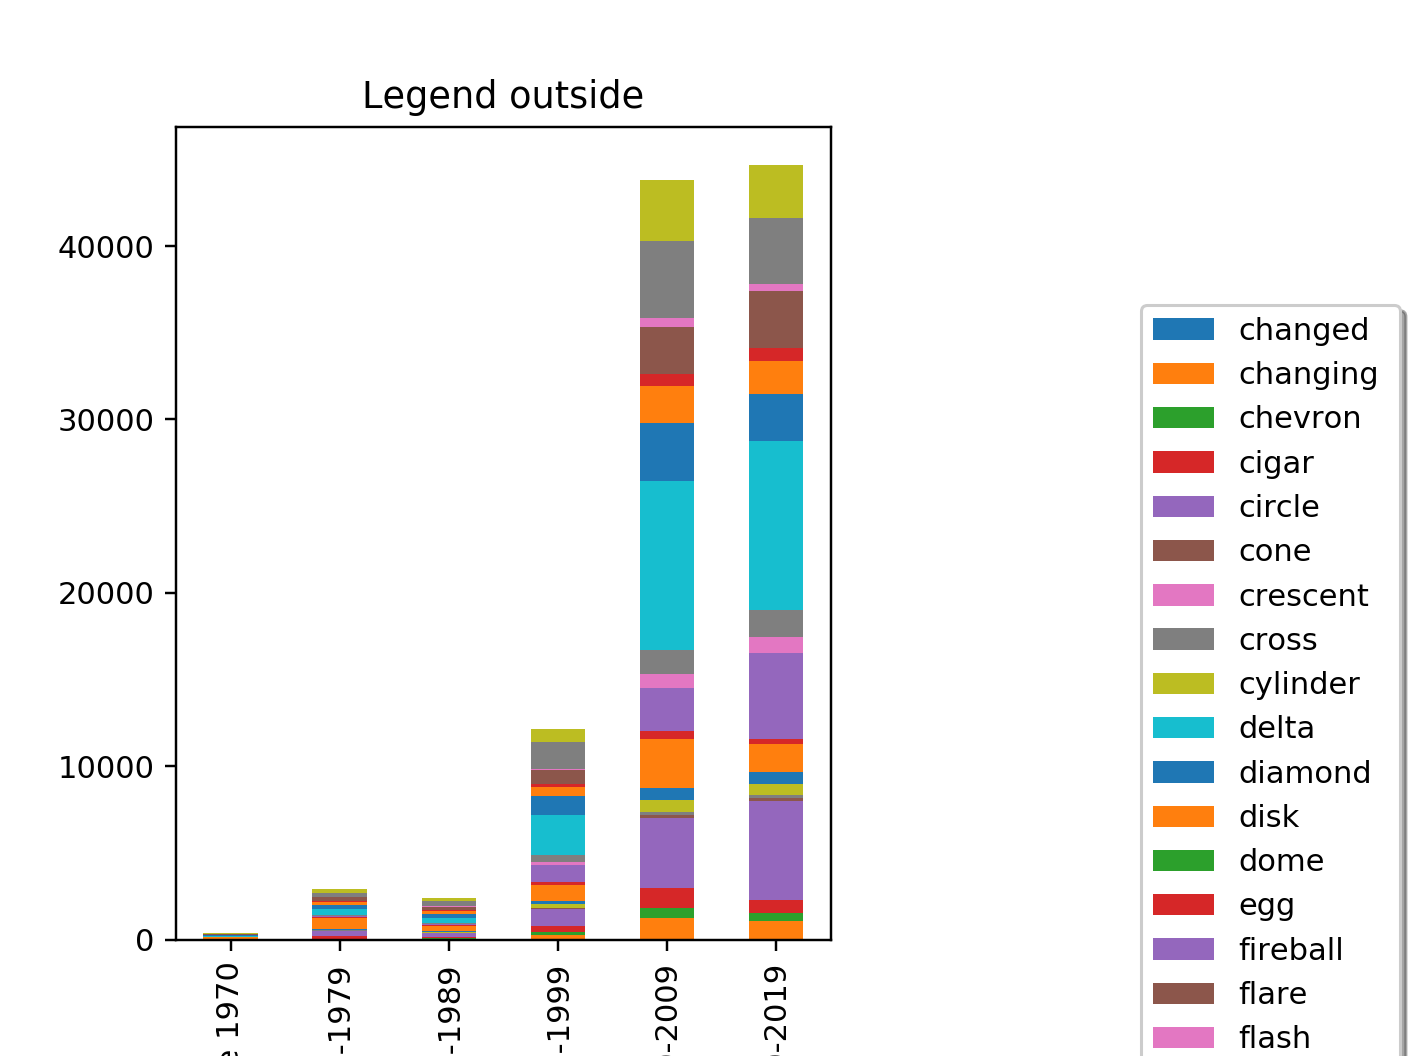

In [70]:
ax = shape_df.plot(kind='bar',stacked=True)
plt.title('Legend outside')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper left', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()